In [4]:
include("/Users/meesvandartel/Desktop/LPR FinGrow/Reprod Paper/GrowthBanks.jl")
using .GrowthBanks
using Agents
using Plots
using HypothesisTests
using ProgressMeter

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


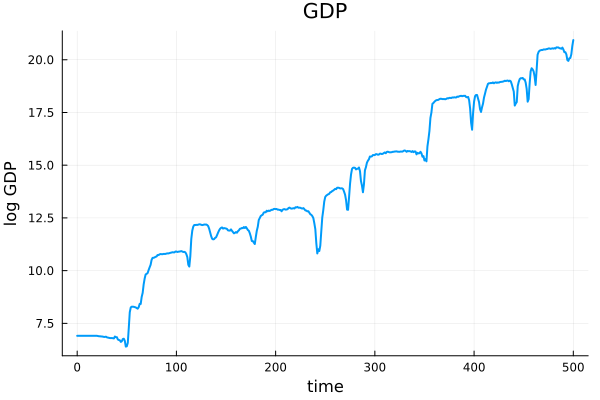

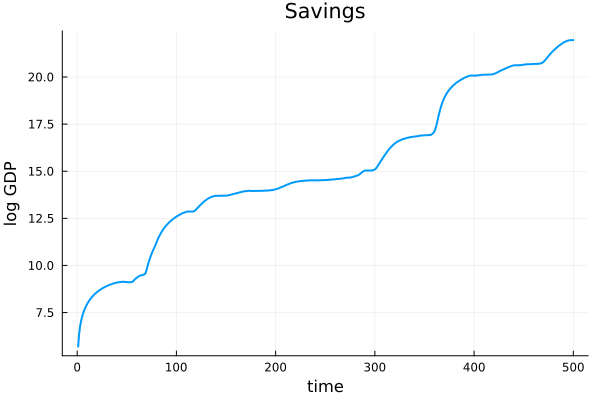

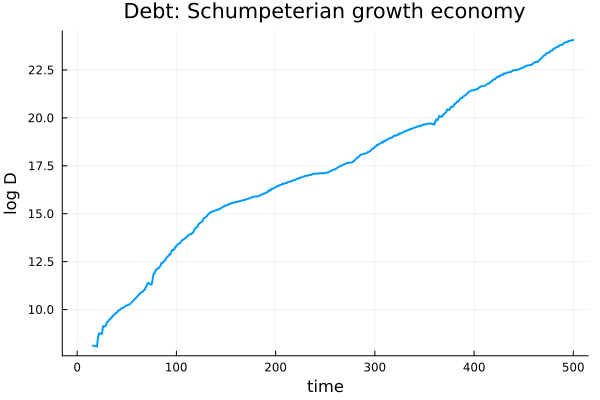

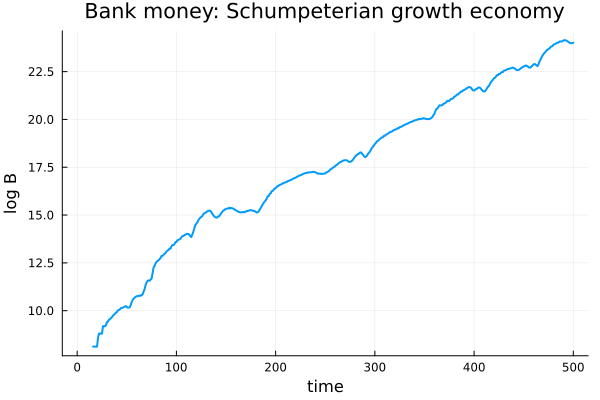

In [5]:
model1 = GrowthBanks.initialize_econ(;seed = 41)
GDP_series = []
E_series = []
D_series = []
B_series = []
dates = 0:500

@showprogress for t in dates

    GDP = 0
    Eq = 0
    D = 0
    B = 0
    for agent in allagents(model1)
        if isa(agent, GrowthBanks.Firm)
            Q = agent.Q
            E = agent.E
            D += agent.D
            B += agent.B
            GDP += Q
            Eq += E
        end
    end
    push!(GDP_series, log(GDP))
    push!(E_series, log(Eq))
    push!(D_series, log(D))
    push!(B_series, log(B))
    step!(model1)
end
GDP_series = convert(Vector{Float64}, GDP_series)
D_series = convert(Vector{Float64}, D_series)
B_series = convert(Vector{Float64}, B_series)

p = plot(dates, GDP_series,
    title="GDP", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)

p2 = plot(dates, E_series,
    title="Savings", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)

p3 = plot(dates, D_series,
    title="Debt: Schumpeterian growth economy", xlabel="time", ylabel="log D", linewidth=2, legend=false, grid=true)

p4 = plot(dates, B_series,
    title="Bank money: Schumpeterian growth economy", xlabel="time", ylabel="log B", linewidth=2, legend=false, grid=true)

# Display the plots
display(p)
display(p2)
display(p3)
display(p4)

In [6]:
ADFTest(GDP_series, :constant, 0)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.00103909

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.8887

Details:
    sample size in regression:          500
    number of lags:                     0
    ADF statistic:                      -0.516925
    Critical values at 1%, 5%, and 10%: [-3.44347 -2.86733 -2.56985]
